Generated 3000 records for 50 users
    user_id        date day_of_week  steps  calories_burned  distance_km  age  \
0  USER_001  2025-11-28      Friday   8009            320.4         5.45   56   
1  USER_001  2025-11-29    Saturday   6808            272.3         4.63   56   
2  USER_001  2025-11-30      Sunday  13293            531.7         9.05   56   
3  USER_001  2025-12-01      Monday   5079            203.2         3.46   56   
4  USER_001  2025-12-02     Tuesday   8803            352.1         5.99   56   

   weight  height gender activity_level  weekend  
0      78     164      M       moderate        0  
1      78     164      M       moderate        1  
2      78     164      M       moderate        1  
3      78     164      M       moderate        0  
4      78     164      M       moderate        0  

Data shape: (3000, 12)
=== DATA VALIDATION REPORT ===
✓ No missing values
✓ No duplicate records

=== Value Range Checks ===
Invalid steps range: 0 records
Negative calor

/tmp/ipython-input-3329934329.py:222: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_means = df.groupby('day_of_week')['steps'].mean()


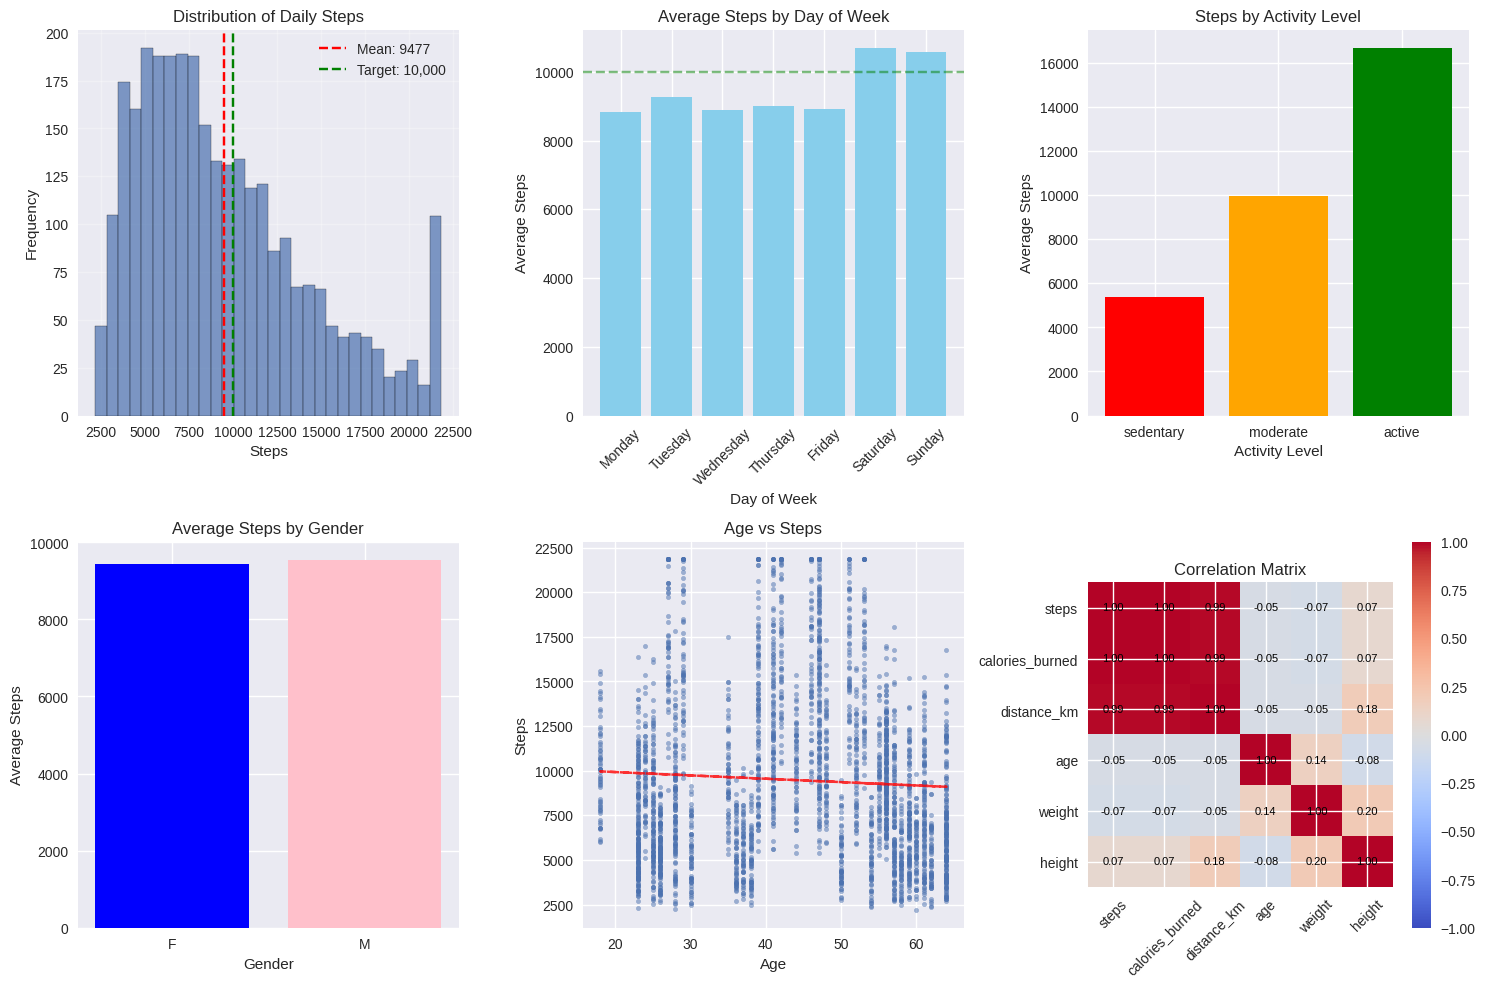


=== STATISTICAL TESTS ===
Gender difference t-test: t=0.614, p=0.5396
Activity level ANOVA: F=4198.796, p=0.0000

Target achievement rate: 38.7%
Performing user segmentation...


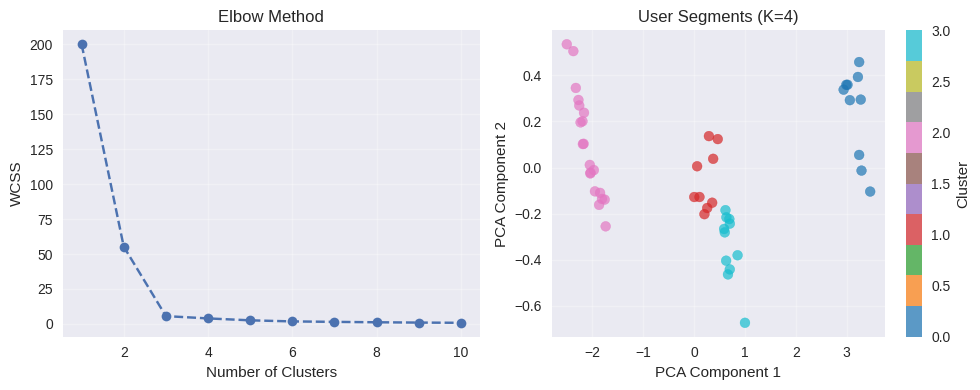


=== CLUSTER PROFILES ===

Cluster 0 (n=10, 20.0%):
  Avg steps: 16677
  Target achievement: 97.8%
  Consistency (1/std): 0.000
  Segment: Highly Active Users

Cluster 1 (n=9, 18.0%):
  Avg steps: 9858
  Target achievement: 46.1%
  Consistency (1/std): 0.000
  Segment: Moderate Users

Cluster 2 (n=20, 40.0%):
  Avg steps: 5377
  Target achievement: 0.4%
  Consistency (1/std): 0.001
  Segment: Sedentary Users

Cluster 3 (n=11, 22.0%):
  Avg steps: 10073
  Target achievement: 48.8%
  Consistency (1/std): 0.000
  Segment: Active Users

Cluster Summary:
           steps_mean    steps_std  target_achieved_mean  consistency  \
cluster                                                                 
0        16677.150000  3541.801000              0.978000     0.000283   
1         9857.984444  2331.770000              0.461111     0.000429   
2         5376.784000  1653.440000              0.003500     0.000606   
3        10073.316364  2636.414545              0.488182     0.000380   

     

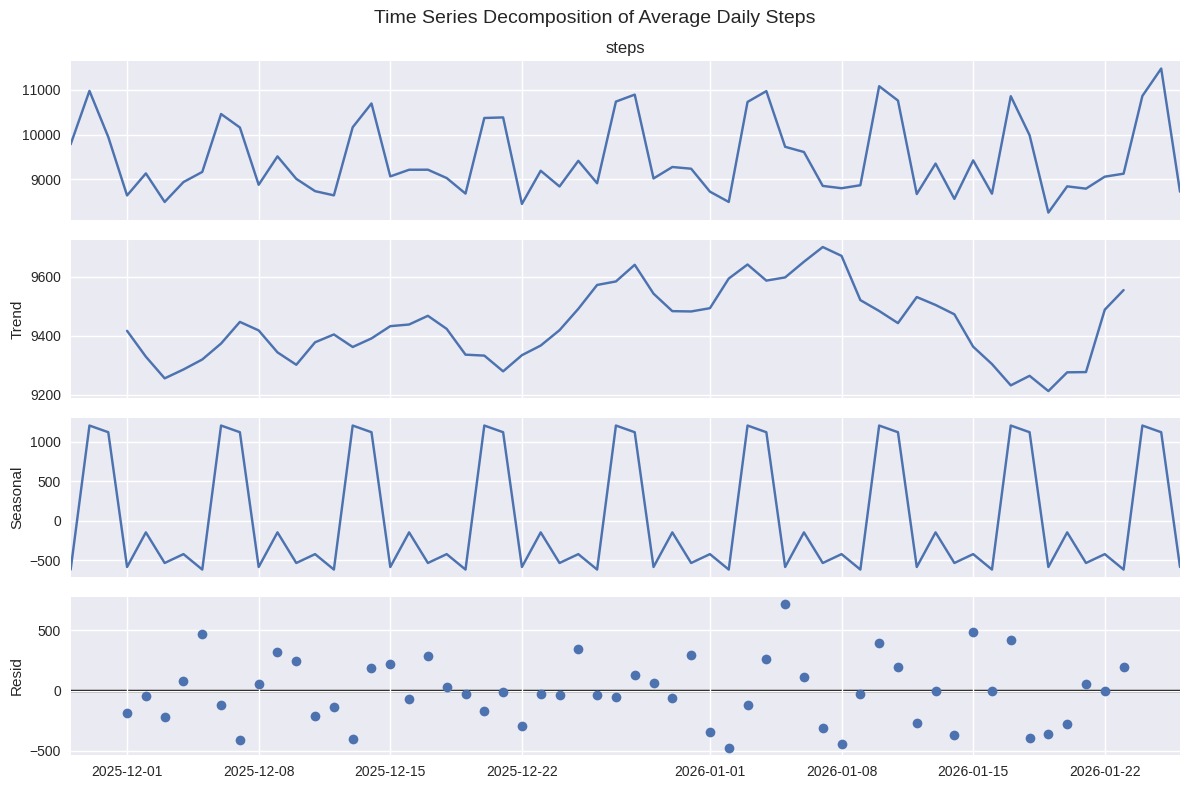

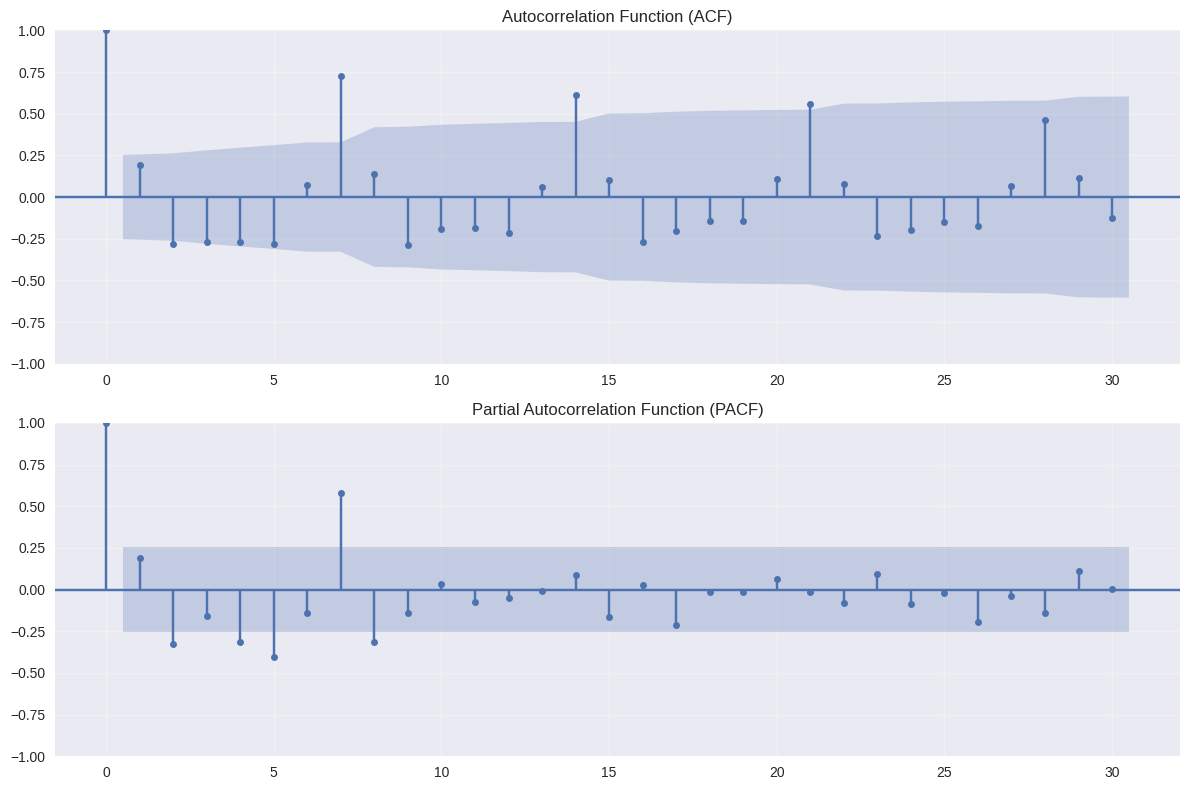


=== FORECASTING RESULTS (Simple Moving Average) ===
MAE: 835.08
RMSE: 996.68
MAPE: 8.54%


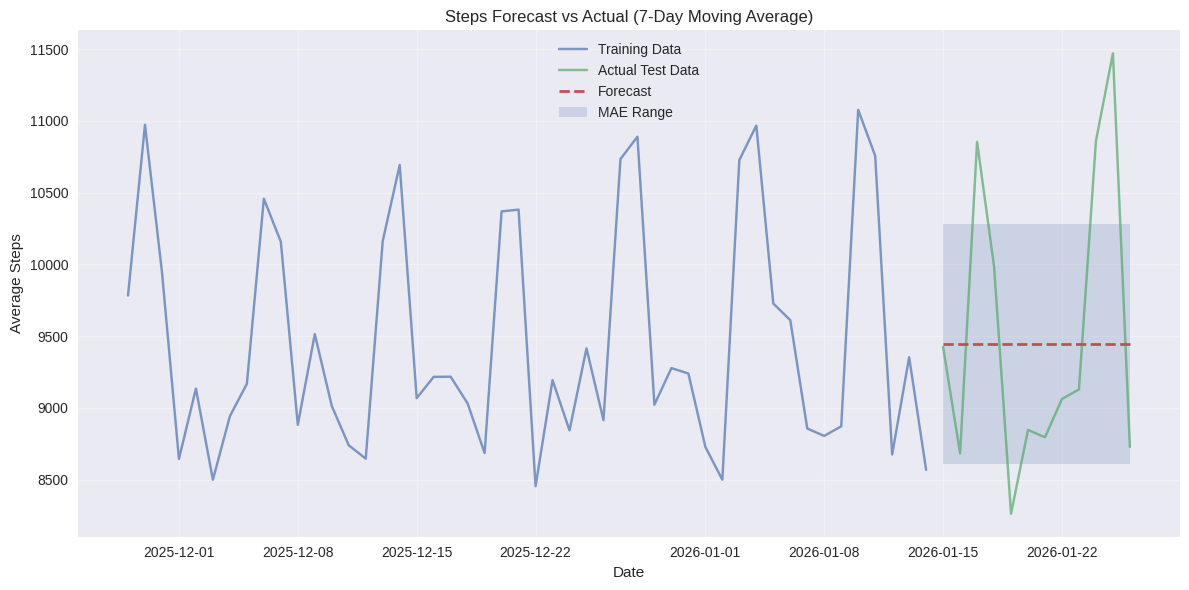

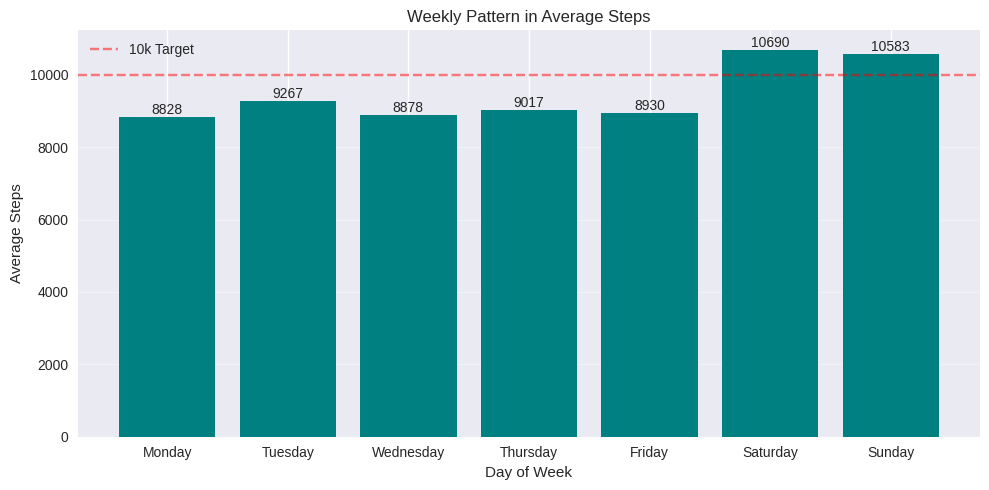

Building predictive models...

Training Linear Regression...
  MAE: 1340.95
  RMSE: 1714.03
  R²: 0.8739
  CV R²: 0.8739 (+/- 0.0086)

Training Ridge Regression...
  MAE: 1341.02
  RMSE: 1713.52
  R²: 0.8740
  CV R²: 0.8739 (+/- 0.0086)

Training Random Forest...
  MAE: 1453.79
  RMSE: 1870.44
  R²: 0.8498
  CV R²: 0.8584 (+/- 0.0106)

Training Gradient Boosting...
  MAE: 1416.08
  RMSE: 1813.30
  R²: 0.8588
  CV R²: 0.8727 (+/- 0.0073)

Training XGBoost...
  MAE: 1536.41
  RMSE: 1995.55
  R²: 0.8290
  CV R²: 0.8395 (+/- 0.0072)

=== MODEL COMPARISON ===
                           MAE         RMSE        R2 CV_R2_mean CV_R2_std
Ridge Regression   1341.020141  1713.524245  0.873952   0.873912  0.008553
Linear Regression  1340.947923  1714.029359  0.873878   0.873915   0.00858
Gradient Boosting  1416.075917  1813.298696  0.858846   0.872693  0.007261
Random Forest      1453.786231  1870.437426   0.84981   0.858369  0.010638
XGBoost            1536.411184  1995.554722  0.829045   0.839494

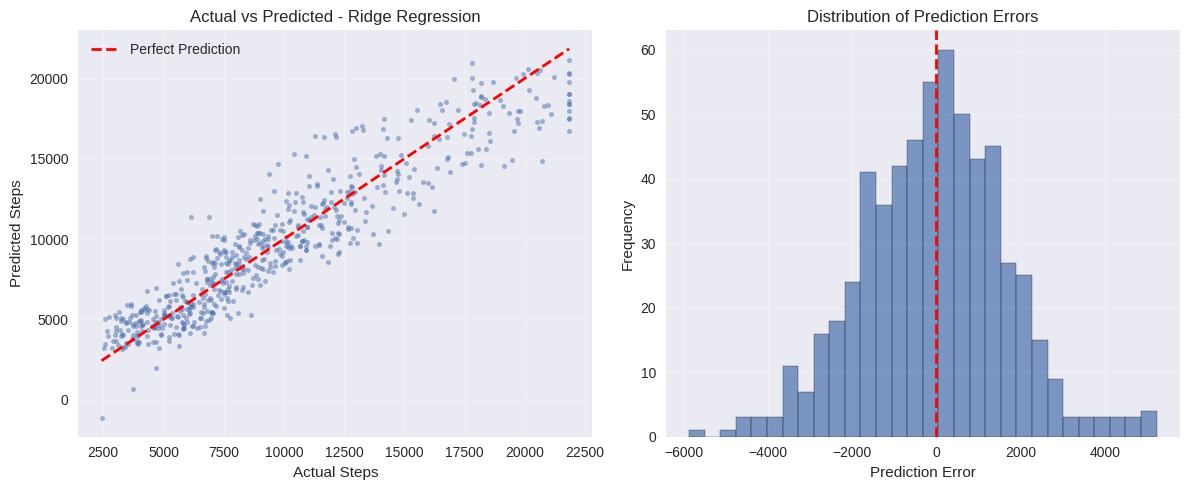


Best model saved: Ridge Regression


In [ ]:
# footsteps_data_generator.py
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

def generate_footsteps_data(num_users=100, days=30):
    """Generate realistic footsteps data for multiple users"""
    np.random.seed(42)

    # Create date range
    dates = pd.date_range(end=datetime.now(), periods=days, freq='D')

    data = []
    for user_id in range(1, num_users + 1):
        # User characteristics
        age = np.random.randint(18, 65)
        weight = np.random.randint(50, 100)  # kg
        height = np.random.randint(150, 190)  # cm
        gender = np.random.choice(['M', 'F'])

        # Activity level (affects step patterns)
        activity_level = np.random.choice(['sedentary', 'moderate', 'active'],
                                         p=[0.3, 0.5, 0.2])

        for date in dates:
            # Base steps based on activity level
            if activity_level == 'sedentary':
                base_steps = np.random.randint(3000, 7000)
            elif activity_level == 'moderate':
                base_steps = np.random.randint(7000, 12000)
            else:
                base_steps = np.random.randint(12000, 20000)

            # Add randomness and day-of-week effect
            day_factor = 1.2 if date.weekday() in [5, 6] else 1.0  # weekends
            steps = int(base_steps * day_factor * np.random.uniform(0.7, 1.3))

            # Calculate calories (simplified formula)
            calories_burned = steps * 0.04  # approximate

            # Calculate distance (assuming average step length)
            step_length = height * 0.415  # approximate formula
            distance_km = (steps * step_length) / 100000

            data.append({
                'user_id': f'USER_{user_id:03d}',
                'date': date.date(),
                'day_of_week': date.strftime('%A'),
                'steps': steps,
                'calories_burned': round(calories_burned, 1),
                'distance_km': round(distance_km, 2),
                'age': age,
                'weight': weight,
                'height': height,
                'gender': gender,
                'activity_level': activity_level,
                'weekend': 1 if date.weekday() in [5, 6] else 0
            })

    df = pd.DataFrame(data)
    df.to_csv('footsteps_data.csv', index=False)
    print(f"Generated {len(df)} records for {num_users} users")
    return df

if __name__ == "__main__":
    df = generate_footsteps_data(num_users=50, days=60)
    print(df.head())
    print(f"\nData shape: {df.shape}")

    # data_validation.py
import pandas as pd
import numpy as np

def validate_footsteps_data(df):
    """Check data quality and identify issues"""

    print("=== DATA VALIDATION REPORT ===")

    # 1. Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("Missing values found:")
        print(missing[missing > 0])
    else:
        print("✓ No missing values")

    # 2. Check for duplicates
    duplicates = df.duplicated(subset=['user_id', 'date']).sum()
    if duplicates > 0:
        print(f"⚠ Found {duplicates} duplicate records")
    else:
        print("✓ No duplicate records")

    # 3. Validate ranges
    print("\n=== Value Range Checks ===")

    # Steps should be positive and reasonable
    invalid_steps = df[(df['steps'] < 0) | (df['steps'] > 50000)]
    print(f"Invalid steps range: {len(invalid_steps)} records")

    # Calories should be positive
    invalid_calories = df[df['calories_burned'] < 0]
    print(f"Negative calories: {len(invalid_calories)} records")

    # 4. Statistical summary
    print("\n=== Statistical Summary ===")
    print(f"Total users: {df['user_id'].nunique()}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Average steps per day: {df['steps'].mean():.0f}")
    print(f"Median steps: {df['steps'].median():.0f}")

    # 5. User consistency check
    user_consistency = df.groupby('user_id')['steps'].std()
    print(f"\nUsers with inconsistent data (std > 5000): {len(user_consistency[user_consistency > 5000])}")

    return {
        'missing_values': missing.sum(),
        'duplicates': duplicates,
        'invalid_steps': len(invalid_steps),
        'invalid_calories': len(invalid_calories)
    }

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data.csv')
    df['date'] = pd.to_datetime(df['date'])
    validation_report = validate_footsteps_data(df)

    # data_cleaning.py
import pandas as pd
import numpy as np

def clean_footsteps_data(df):
    """Clean and prepare data for analysis"""

    print("Starting data cleaning...")

    # Create a copy to avoid modifying original
    df_clean = df.copy()

    # 1. Handle outliers using IQR method
    Q1 = df_clean['steps'].quantile(0.25)
    Q3 = df_clean['steps'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean['steps'] < lower_bound) |
                       (df_clean['steps'] > upper_bound)]
    print(f"Found {len(outliers)} outliers ({len(outliers)/len(df_clean)*100:.1f}%)")

    # Cap outliers instead of removing
    df_clean['steps'] = np.where(df_clean['steps'] < lower_bound, lower_bound, df_clean['steps'])
    df_clean['steps'] = np.where(df_clean['steps'] > upper_bound, upper_bound, df_clean['steps'])

    # 2. Recalculate derived metrics
    df_clean['calories_burned'] = df_clean['steps'] * 0.04
    df_clean['distance_km'] = (df_clean['steps'] * df_clean['height'] * 0.415) / 100000

    # 3. Add additional features
    df_clean['month'] = df_clean['date'].dt.month
    df_clean['week_number'] = df_clean['date'].dt.isocalendar().week

    # 4. Calculate daily targets (10,000 steps)
    df_clean['target_achieved'] = df_clean['steps'] >= 10000
    df_clean['steps_to_target'] = np.maximum(0, 10000 - df_clean['steps'])

    # 5. Create activity categories
    def categorize_activity(steps):
        if steps < 5000:
            return 'Sedentary'
        elif steps < 7500:
            return 'Light'
        elif steps < 10000:
            return 'Moderate'
        elif steps < 12500:
            return 'Active'
        else:
            return 'Very Active'

    df_clean['activity_category'] = df_clean['steps'].apply(categorize_activity)

    print(f"Cleaned data shape: {df_clean.shape}")
    print("New columns added:", list(df_clean.columns[-5:]))

    # Save cleaned data
    df_clean.to_csv('footsteps_data_clean.csv', index=False)

    return df_clean

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data.csv')
    df['date'] = pd.to_datetime(df['date'])
    df_clean = clean_footsteps_data(df)

    # exploratory_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def perform_eda(df):
    """Perform exploratory data analysis"""

    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # 1. Distribution of steps
    axes[0, 0].hist(df['steps'], bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(df['steps'].mean(), color='red', linestyle='--', label=f"Mean: {df['steps'].mean():.0f}")
    axes[0, 0].axvline(10000, color='green', linestyle='--', label='Target: 10,000')
    axes[0, 0].set_xlabel('Steps')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Daily Steps')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Steps by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
    day_means = df.groupby('day_of_week')['steps'].mean()

    axes[0, 1].bar(day_means.index, day_means.values, color='skyblue')
    axes[0, 1].axhline(y=10000, color='green', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].set_ylabel('Average Steps')
    axes[0, 1].set_title('Average Steps by Day of Week')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Steps by activity level
    activity_order = ['sedentary', 'moderate', 'active']
    activity_means = df.groupby('activity_level')['steps'].mean().reindex(activity_order)

    axes[0, 2].bar(activity_means.index, activity_means.values, color=['red', 'orange', 'green'])
    axes[0, 2].set_xlabel('Activity Level')
    axes[0, 2].set_ylabel('Average Steps')
    axes[0, 2].set_title('Steps by Activity Level')

    # 4. Steps by gender
    gender_means = df.groupby('gender')['steps'].mean()
    axes[1, 0].bar(gender_means.index, gender_means.values, color=['blue', 'pink'])
    axes[1, 0].set_xlabel('Gender')
    axes[1, 0].set_ylabel('Average Steps')
    axes[1, 0].set_title('Average Steps by Gender')

    # 5. Age vs Steps scatter
    axes[1, 1].scatter(df['age'], df['steps'], alpha=0.5, s=10)
    z = np.polyfit(df['age'], df['steps'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(df['age'], p(df['age']), "r--", alpha=0.8)
    axes[1, 1].set_xlabel('Age')
    axes[1, 1].set_ylabel('Steps')
    axes[1, 1].set_title('Age vs Steps')

    # 6. Correlation heatmap
    numeric_cols = ['steps', 'calories_burned', 'distance_km', 'age', 'weight', 'height']
    corr_matrix = df[numeric_cols].corr()

    im = axes[1, 2].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1, 2].set_xticks(range(len(numeric_cols)))
    axes[1, 2].set_yticks(range(len(numeric_cols)))
    axes[1, 2].set_xticklabels(numeric_cols, rotation=45)
    axes[1, 2].set_yticklabels(numeric_cols)
    axes[1, 2].set_title('Correlation Matrix')

    # Add correlation values
    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            text = axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                                  ha="center", va="center", color="black", fontsize=8)

    plt.colorbar(im, ax=axes[1, 2])
    plt.tight_layout()
    plt.savefig('eda_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Statistical tests
    print("\n=== STATISTICAL TESTS ===")

    # T-test between genders
    male_steps = df[df['gender'] == 'M']['steps']
    female_steps = df[df['gender'] == 'F']['steps']
    t_stat, p_value = stats.ttest_ind(male_steps, female_steps, equal_var=False)
    print(f"Gender difference t-test: t={t_stat:.3f}, p={p_value:.4f}")

    # ANOVA between activity levels
    groups = [df[df['activity_level'] == level]['steps'] for level in activity_order]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"Activity level ANOVA: F={f_stat:.3f}, p={p_value:.4f}")

    # Target achievement rate
    target_rate = df['target_achieved'].mean() * 100
    print(f"\nTarget achievement rate: {target_rate:.1f}%")

    return {
        'gender_t_test': (t_stat, p_value),
        'activity_anova': (f_stat, p_value),
        'target_achievement': target_rate
    }

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data_clean.csv')
    df['date'] = pd.to_datetime(df['date'])
    stats_results = perform_eda(df)

    # user_segmentation.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def segment_users(df):
    """Perform user segmentation using clustering"""

    print("Performing user segmentation...")

    # Create user-level features
    user_features = df.groupby('user_id').agg({
        'steps': ['mean', 'std', 'max', 'min'],
        'calories_burned': 'sum',
        'distance_km': 'sum',
        'target_achieved': 'mean',
        'age': 'first',
        'gender': 'first',
        'activity_level': 'first',
        'weekend': 'mean'
    }).round(2)

    # Flatten column names
    user_features.columns = ['_'.join(col).strip() for col in user_features.columns.values]
    user_features = user_features.reset_index()

    # Feature engineering
    user_features['consistency'] = 1 / (1 + user_features['steps_std'])
    user_features['weekend_ratio'] = user_features['weekend_mean']
    user_features['active_days_ratio'] = user_features['target_achieved_mean']

    # Select features for clustering
    clustering_features = ['steps_mean', 'steps_std', 'target_achieved_mean',
                          'consistency', 'weekend_ratio']
    X = user_features[clustering_features]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine optimal number of clusters using elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.grid(True, alpha=0.3)

    # Apply K-means (choose 4 clusters based on elbow)
    n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    user_features['cluster'] = kmeans.fit_predict(X_scaled)

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    user_features['pca1'] = X_pca[:, 0]
    user_features['pca2'] = X_pca[:, 1]

    # Plot clusters
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(user_features['pca1'], user_features['pca2'],
                         c=user_features['cluster'], cmap='tab10', s=50, alpha=0.7)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'User Segments (K={n_clusters})')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('user_segments.png', dpi=300)
    plt.show()

    # Analyze cluster characteristics
    cluster_summary = user_features.groupby('cluster')[clustering_features].mean()
    cluster_summary['count'] = user_features['cluster'].value_counts().sort_index()
    cluster_summary['percentage'] = (cluster_summary['count'] / len(user_features) * 100).round(1)

    print("\n=== CLUSTER PROFILES ===")
    for cluster_id in range(n_clusters):
        cluster_data = user_features[user_features['cluster'] == cluster_id]
        print(f"\nCluster {cluster_id} (n={len(cluster_data)}, {len(cluster_data)/len(user_features)*100:.1f}%):")
        print(f"  Avg steps: {cluster_data['steps_mean'].mean():.0f}")
        print(f"  Target achievement: {cluster_data['target_achieved_mean'].mean()*100:.1f}%")
        print(f"  Consistency (1/std): {cluster_data['consistency'].mean():.3f}")

        # Give meaningful names
        avg_steps = cluster_data['steps_mean'].mean()
        if avg_steps < 7000:
            segment_name = "Sedentary Users"
        elif avg_steps < 10000:
            segment_name = "Moderate Users"
        elif avg_steps < 13000:
            segment_name = "Active Users"
        else:
            segment_name = "Highly Active Users"

        print(f"  Segment: {segment_name}")

    # Save user segments
    user_features.to_csv('user_segments.csv', index=False)

    return user_features, cluster_summary

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data_clean.csv')
    user_segments, cluster_info = segment_users(df)
    print("\nCluster Summary:")
    print(cluster_info)

    # time_series_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

def analyze_time_series(df):
    """Analyze trends, seasonality and forecast steps"""

    print("Performing time series analysis...")

    # Aggregate to daily level
    daily_data = df.groupby('date').agg({
        'steps': 'mean',
        'user_id': 'nunique'
    }).rename(columns={'user_id': 'active_users'})

    # Ensure continuous time series
    date_range = pd.date_range(start=daily_data.index.min(),
                               end=daily_data.index.max(), freq='D')
    daily_data = daily_data.reindex(date_range)

    # Simple forward fill for missing days
    daily_data = daily_data.fillna(method='ffill')

    # Decompose time series
    decomposition = seasonal_decompose(daily_data['steps'], model='additive', period=7)

    # Plot decomposition
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle('Time Series Decomposition of Average Daily Steps', fontsize=14)
    plt.tight_layout()
    plt.savefig('time_series_decomposition.png', dpi=300)
    plt.show()

    # ACF and PACF plots
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(daily_data['steps'].dropna(), lags=30, ax=axes[0])
    axes[0].set_title('Autocorrelation Function (ACF)')
    axes[0].grid(True, alpha=0.3)

    plot_pacf(daily_data['steps'].dropna(), lags=30, ax=axes[1])
    axes[1].set_title('Partial Autocorrelation Function (PACF)')
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('acf_pacf_plots.png', dpi=300)
    plt.show()

    # Simple forecasting using moving average
    train_size = int(len(daily_data) * 0.8)
    train = daily_data['steps'].iloc[:train_size]
    test = daily_data['steps'].iloc[train_size:]

    # 7-day moving average forecast
    forecast = train.rolling(window=7).mean().iloc[-1]
    predictions = [forecast] * len(test)

    # Calculate metrics
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(test, predictions))
    mape = np.mean(np.abs((test - predictions) / test)) * 100

    print("\n=== FORECASTING RESULTS (Simple Moving Average) ===")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train.values, label='Training Data', alpha=0.7)
    plt.plot(test.index, test.values, label='Actual Test Data', alpha=0.7)
    plt.plot(test.index, predictions, label='Forecast', linestyle='--', linewidth=2)
    plt.fill_between(test.index,
                     [p - mae for p in predictions],
                     [p + mae for p in predictions],
                     alpha=0.2, label='MAE Range')
    plt.xlabel('Date')
    plt.ylabel('Average Steps')
    plt.title('Steps Forecast vs Actual (7-Day Moving Average)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('forecast_results.png', dpi=300)
    plt.show()

    # Weekly patterns
    daily_data['day_of_week'] = daily_data.index.day_name()
    weekly_pattern = daily_data.groupby('day_of_week')['steps'].mean()

    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_pattern = weekly_pattern.reindex(day_order)

    plt.figure(figsize=(10, 5))
    bars = plt.bar(weekly_pattern.index, weekly_pattern.values, color='teal')
    plt.axhline(y=10000, color='red', linestyle='--', alpha=0.5, label='10k Target')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Steps')
    plt.title('Weekly Pattern in Average Steps')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('weekly_pattern.png', dpi=300)
    plt.show()

    return {
        'decomposition': decomposition,
        'metrics': {'MAE': mae, 'RMSE': rmse, 'MAPE': mape},
        'weekly_pattern': weekly_pattern.to_dict(),
        'daily_data': daily_data
    }

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data_clean.csv')
    df['date'] = pd.to_datetime(df['date'])
    ts_results = analyze_time_series(df)

    # predictive_modeling.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import joblib

def build_predictive_models(df):
    """Build models to predict daily steps"""

    print("Building predictive models...")

    # Feature engineering
    df_model = df.copy()

    # Encode categorical variables
    le_gender = LabelEncoder()
    le_activity = LabelEncoder()
    le_day = LabelEncoder()

    df_model['gender_encoded'] = le_gender.fit_transform(df_model['gender'])
    df_model['activity_encoded'] = le_activity.fit_transform(df_model['activity_level'])
    df_model['day_encoded'] = le_day.fit_transform(df_model['day_of_week'])

    # Lag features (previous day's steps)
    df_model['prev_day_steps'] = df_model.groupby('user_id')['steps'].shift(1)
    df_model['prev_day_steps'] = df_model['prev_day_steps'].fillna(df_model['steps'].mean())

    # Rolling features
    df_model['rolling_avg_3d'] = df_model.groupby('user_id')['steps'].transform(
        lambda x: x.rolling(3, min_periods=1).mean())
    df_model['rolling_avg_7d'] = df_model.groupby('user_id')['steps'].transform(
        lambda x: x.rolling(7, min_periods=1).mean())

    # Define features and target
    feature_cols = ['age', 'weight', 'height', 'gender_encoded', 'activity_encoded',
                   'day_encoded', 'weekend', 'prev_day_steps', 'rolling_avg_3d',
                   'rolling_avg_7d']

    X = df_model[feature_cols]
    y = df_model['steps']

    # Remove any remaining NaN
    X = X.fillna(X.mean())

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
    }

    # Train and evaluate models
    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train
        model.fit(X_train_scaled, y_train)

        # Predict
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                   cv=5, scoring='r2')

        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'model': model
        }

        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  R²: {r2:.4f}")
        print(f"  CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    # Compare models
    results_df = pd.DataFrame(results).T
    results_df = results_df[['MAE', 'RMSE', 'R2', 'CV_R2_mean', 'CV_R2_std']]
    results_df = results_df.sort_values('R2', ascending=False)

    print("\n=== MODEL COMPARISON ===")
    print(results_df)

    # Feature importance for best tree-based model
    best_model_name = results_df.index[0]
    best_model = results[best_model_name]['model']

    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_importance = pd.DataFrame({
            'feature': feature_cols,
            'importance': importances
        }).sort_values('importance', ascending=False)

        plt.figure(figsize=(10, 6))
        bars = plt.barh(feature_importance['feature'], feature_importance['importance'])
        plt.xlabel('Importance')
        plt.title(f'Feature Importance - {best_model_name}')
        plt.gca().invert_yaxis()
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300)
        plt.show()

        print("\n=== FEATURE IMPORTANCE ===")
        print(feature_importance)

    # Plot predictions vs actual
    plt.figure(figsize=(12, 5))

    # Get best model predictions
    best_predictions = best_model.predict(X_test_scaled)

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, best_predictions, alpha=0.5, s=10)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Steps')
    plt.ylabel('Predicted Steps')
    plt.title(f'Actual vs Predicted - {best_model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    error = best_predictions - y_test
    plt.hist(error, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prediction Errors')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('prediction_analysis.png', dpi=300)
    plt.show()

    # Save the best model
    joblib.dump({
        'model': best_model,
        'scaler': scaler,
        'feature_cols': feature_cols,
        'label_encoders': {
            'gender': le_gender,
            'activity': le_activity,
            'day': le_day
        }
    }, 'best_steps_predictor.pkl')

    print(f"\nBest model saved: {best_model_name}")

    return results, results_df

if __name__ == "__main__":
    df = pd.read_csv('footsteps_data_clean.csv')
    df['date'] = pd.to_datetime(df['date'])
    model_results, comparison_df = build_predictive_models(df)

    # business_insights.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_business_insights(df, user_segments):
    """Generate actionable business insights"""

    print("Generating business insights...")

    insights = {}

    # 1. Overall health metrics
    total_steps = df['steps'].sum()
    total_calories = df['calories_burned'].sum()
    total_distance = df['distance_km'].sum()

    avg_daily_steps = df.groupby('date')['steps'].mean().mean()
    target_achievement_rate = df['target_achieved'].mean() * 100

    insights['overall_metrics'] = {
        'total_steps_billion': round(total_steps / 1e9, 3),
        'total_calories_million': round(total_calories / 1e6, 2),
        'total_distance_km': round(total_distance, 0),
        'avg_daily_steps': round(avg_daily_steps, 0),
        'target_achievement_rate': round(target_achievement_rate, 1)
    }

    # 2. User engagement analysis
    days_active = df.groupby('user_id')['date'].nunique()
    engagement_segments = pd.cut(days_active,
                                bins=[0, 15, 45, 60],
                                labels=['Low', 'Medium', 'High'])

    engagement_dist = engagement_segments.value_counts(normalize=True) * 100

    insights['engagement'] = {
        'highly_engaged_pct': round(engagement_dist.get('High', 0), 1),
        'avg_active_days': round(days_active.mean(), 1),
        'retention_rate': round(days_active[days_active >= 30].count() / len(days_active) * 100, 1)
    }

    # 3. Monetization potential
    # Assume premium features could increase steps by 20%
    premium_impact = 0.20
    potential_upsell = len(user_segments[user_segments['cluster'].isin([2, 3])])  # Active clusters

    # Calculate health cost savings (simplified)
    # Regular physical activity reduces healthcare costs

